In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['parch'] = df['Parch']
X['sibsp'] = df['SibSp']
X['pclass'] = df['Pclass']
X['survived'] = df['Survived']

Replace the empty ages with the mean

In [6]:
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [7]:
y = X['survived']

In [8]:
X = X.drop(['survived'], axis=1)

In [9]:
X['sex'] = pd.get_dummies(X.sex)['female']

In [10]:
X

,sex,age,parch,sibsp,pclass
0,0,22.000000,0,1,3
1,1,38.000000,0,1,1
2,1,26.000000,0,0,3
3,1,35.000000,0,1,1
4,0,35.000000,0,0,3
5,0,29.699118,0,0,3
6,0,54.000000,0,0,1
7,0,2.000000,1,3,3
8,1,27.000000,2,0,3
9,1,14.000000,0,1,2


Scalar Feature

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Base Rate Model

In [13]:
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [14]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print "Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate)

Base rate accuracy is 0.59


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)

In [16]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [17]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.82


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [19]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.83      0.88      0.85       105
          1       0.81      0.74      0.77        74

avg / total       0.82      0.82      0.82       179



In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

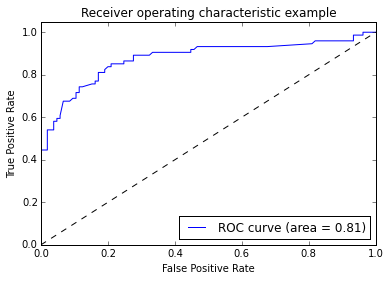

In [21]:
# Plot of a ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()